In [38]:
#export .xls from SEMrush for a period / day, save to desktop
#https://www.semrush.com/tracking/landscape/3317965.html?domain_1=expert.nl&domain_2=coolblue.nl&domain_3=wehkamp.nl&domain_4=mediamarkt.nl&domain_5=bcc.nl

In [45]:
#import all libraries, widgets and ignore warnings
import win32com.client as win32
import os
import pandas as pd
import numpy as np
import re
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
from ipywidgets import interactive, widgets, interact, interact_manual
import ipywidgets as widgets
from IPython.core.display import display, HTML
from pivottablejs import pivot_ui

import warnings
warnings.simplefilter('ignore')

In [ ]:
#convert .xls to .xlsx
fname = "C:\\Users\\marc.herrikhuijzen\\Desktop\\{exportSEMrush.xls}"
excel = win32.gencache.EnsureDispatch('Excel.Application')
wb = excel.Workbooks.Open(fname)
#fileformet 51 == xlsx format
wb.SaveAs("C:\\Users\\marc.herrikhuijzen\\Desktop\\PythonProjects\\reporting\\rankings_converted\\20200930", FileFormat = 51)
wb.Close()
excel.Application.Quit()

In [6]:
#read .xlsx into dataframe
df_20200930 = pd.read_excel("./rankings_converted/20200930.xlsx", header=7)
#replace empty landing pages
df_20200930.replace(r'\s+',np.nan,regex=True).replace('',np.nan, inplace=True)
#add date to columns, date should be changed manually
df_20200930['Datum'] = '2020-9-30'
#to avoid a warning
pd.options.mode.chained_assignment = None 
#date to datetime64 dtype
df_20200930['Datum'] =  pd.to_datetime(df_20200930['Datum'], format='%Y%m%d', infer_datetime_format=True)
#rename columns
df_20200930.rename(columns={'tags':'Tags','*.expert.nl/*_20200930': 'Rankings_Expert', '*.expert.nl/*_20200930_landing': 'Expert_url','*.bcc.nl/*_20200930': 'Rankings_BCC', '*.bcc.nl/*_20200930_landing': 'BCC_url','*.coolblue.nl/*_20200930': 'Rankings_Coolblue', '*.coolblue.nl/*_20200930_landing': 'Coolblue_url','*.mediamarkt.nl/*_20200930': 'Rankings_Mediamarkt', '*.mediamarkt.nl/*_20200930_landing': 'Mediamarkt_url','*.wehkamp.nl/*_20200930': 'Rankings_Wehkamp', '*.wehkamp.nl/*_20200930_landing': 'Wehkamp_url','Search Volume': 'Search_Volume'}, inplace=True)
#define which columns will be used
use_cols_20200930 = df_20200930[['Datum','Keyword','Tags','Rankings_Expert','Expert_url','Rankings_BCC','BCC_url','Rankings_Coolblue','Coolblue_url','Rankings_Mediamarkt','Mediamarkt_url','Rankings_Wehkamp','Wehkamp_url','CPC','Search_Volume']]
#check if it works
df_20200930.head()

,Keyword,Rankings_Expert,*.expert.nl/*_20200930_type,Expert_url,*.expert.nl/*_difference,Rankings_Coolblue,*.coolblue.nl/*_20200930_type,Coolblue_url,*.coolblue.nl/*_difference,Rankings_Wehkamp,...,Mediamarkt_url,*.mediamarkt.nl/*_difference,Rankings_BCC,*.bcc.nl/*_20200930_type,BCC_url,*.bcc.nl/*_difference,Tags,CPC,Search_Volume,Datum
0,beko koelkast,1,organic,"""https://www.expert.nl/witgoed/koelkasten/_mer...",0,29,reviews,"""https://www.coolblue.nl/product/475729/beko-c...",0,31,...,"""https://www.mediamarkt.nl/nl/category/_beko-k...",0,15,organic,"""https://www.bcc.nl/keuken/koelkast/koel-vries...",0,keuken|koelkast,0.46,2400,2020-09-30
1,beko vaatwasser,1,organic,"""https://www.expert.nl/witgoed/vaatwassers/_me...",0,28,reviews,"""https://www.coolblue.nl/product/599201/beko-d...",0,20,...,"""https://www.mediamarkt.nl/nl/category/_beko-v...",0,11,organic,"""https://www.bcc.nl/keuken/vaatwasser/beko""",0,keuken|vaatwasser,0.47,2400,2020-09-30
2,beko wasmachine,1,organic,"""https://www.expert.nl/witgoed/wasmachines/_me...",0,22,reviews,"""https://www.coolblue.nl/product/727917/beko-w...",0,26,...,"""https://www.mediamarkt.nl/nl/category/_beko-w...",0,8,organic,"""https://www.bcc.nl/huishouden/wasmachine/beko""",0,huishouden|wasmachine,0.56,5400,2020-09-30
3,combi magnetron,1,site links,"""https://www.expert.nl/koken/magnetrons/combim...",0,3,site links,"""https://www.coolblue.nl/magnetrons/combi-magn...",0,39,...,"""https://www.mediamarkt.nl/nl/category/_combim...",0,4,site links,"""https://www.bcc.nl/keuken/magnetron-en-oven/c...",0,combimagnetron|keuken,0.30,14800,2020-09-30
4,combimagnetron,1,site links,"""https://www.expert.nl/koken/magnetrons/combim...",0,4,site links,"""https://www.coolblue.nl/magnetrons/combi-magn...",0,20,...,"""https://www.mediamarkt.nl/nl/category/_combim...",0,3,site links,"""https://www.bcc.nl/keuken/magnetron-en-oven/c...",0,combimagnetron|keuken,0.30,27100,2020-09-30


In [ ]:
#save to new .xlsx file
use_cols_20200930.to_excel('./use_cols/20200930.xlsx')

In [46]:
#combine all files from directory
files = [file for file in os.listdir('./use_cols/')]
workfile = pd.DataFrame()
for file in files:
    df = pd.read_excel('./use_cols/'+file)
    workfile = pd.concat([workfile, df])
#check results
workfile.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20556 entries, 0 to 570
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Unnamed: 0           20556 non-null  int64         
 1   Datum                20556 non-null  datetime64[ns]
 2   Keyword              20556 non-null  object        
 3   Tags                 20556 non-null  object        
 4   Rankings_Expert      20556 non-null  int64         
 5   Expert_url           17279 non-null  object        
 6   Rankings_BCC         20556 non-null  int64         
 7   BCC_url              19553 non-null  object        
 8   Rankings_Coolblue    20556 non-null  int64         
 9   Coolblue_url         20307 non-null  object        
 10  Rankings_Mediamarkt  20556 non-null  int64         
 11  Mediamarkt_url       19307 non-null  object        
 12  Rankings_Wehkamp     20556 non-null  int64         
 13  Wehkamp_url          15492 non-nu

In [47]:
#categorize all keywords from txt file
tags = pd.read_csv('./workfile/tags.txt', sep=';')
#merge tags on keywords, check and export to new .csv (workfile)
output = workfile.merge(tags, on='Tags')
output.head()
output.to_csv('./workfile/output.csv', index=False)

# CREATE VISIBILITY REPORT

In [48]:
#open workfile
df = pd.read_csv('./workfile/output.csv',) 
df.drop('Unnamed: 0', axis=1, inplace=True) #df.drop('Unnamed: 0.1', axis=1, inplace=True) <<-- somehow this gives errors...
#replace empty landing pages
df.replace(r'\s+',np.nan,regex=True).replace('',np.nan, inplace=True)

In [49]:
#create visibility_dataframe for each website
#VIS_EXPERT
df_vis_expert = pd.read_excel('./visibility_competitors/vis_expert.xlsx')
df_vis_calc = df.merge(df_vis_expert,on='Rankings_Expert', how='outer')
df_vis_calc['Visibility_Expert'] = df_vis_calc.Visibility_Expert.astype(float)

#VIS_BCC
df_vis_bcc = pd.read_excel('./visibility_competitors/vis_bcc.xlsx')
df_vis_calc2 = df_vis_calc.merge(df_vis_bcc,on='Rankings_BCC', how='outer')
df_vis_calc2['Visibility_BCC'] = df_vis_calc2.Visibility_BCC.astype(float)

#VIS_Coolblue
df_vis_coolblue = pd.read_excel('./visibility_competitors/vis_coolblue.xlsx')
df_vis_calc3 = df_vis_calc2.merge(df_vis_coolblue,on='Rankings_Coolblue', how='outer')
df_vis_calc3['Visibility_Coolblue'] = df_vis_calc3.Visibility_Coolblue.astype(float)

#VIS_Mediamarkt
df_vis_mediamarkt = pd.read_excel('./visibility_competitors/vis_mediamarkt.xlsx')
df_vis_calc4 = df_vis_calc3.merge(df_vis_mediamarkt,on='Rankings_Mediamarkt', how='outer')
df_vis_calc4['Visibility_Mediamarkt'] = df_vis_calc4.Visibility_Mediamarkt.astype(float)

#VIS_Wehkamp
df_vis_wehkamp = pd.read_excel('./visibility_competitors/vis_wehkamp.xlsx')
df_vis_calc5 = df_vis_calc4.merge(df_vis_wehkamp,on='Rankings_Wehkamp', how='outer')
df_vis_calc5['Visibility_Wehkamp'] = df_vis_calc5.Visibility_Wehkamp.astype(float)

In [50]:
#rename file and do some editing
df_workfile = df_vis_calc5.dropna(subset=['Keyword'])
df_workfile.rename(columns={'Tag2':'Categorie'}, inplace=True)
#reset index
df_workfile.reset_index()
#check if it works
df_workfile.head()

,Datum,Keyword,Tags,Rankings_Expert,Expert_url,Rankings_BCC,BCC_url,Rankings_Coolblue,Coolblue_url,Rankings_Mediamarkt,...,Rankings_Wehkamp,Wehkamp_url,CPC,Search_Volume,Categorie,Visibility_Expert,Visibility_BCC,Visibility_Coolblue,Visibility_Mediamarkt,Visibility_Wehkamp
0,2020-01-29,beko koelkast,keuken|koelkast,1.0,https://www.expert.nl/witgoed/koelkasten/_merk...,7,https://www.bcc.nl/keuken/koelkast/beko,20.0,https://www.coolblue.nl/product/475729/beko-cs...,3.0,...,11,https://www.wehkamp.nl/huishouden/beko-shop/be...,0.46,2400.0,Koelkast,1.0000,0.8000,0.3667,0.9333,0.6667
1,2020-01-29,samsung koelkast,keuken|koelkast,8.0,https://www.expert.nl/witgoed/koelkasten/_merk...,7,https://www.bcc.nl/keuken/koelkast/samsung,2.0,https://www.coolblue.nl/koelkasten/samsung,3.0,...,11,https://www.wehkamp.nl/huishouden/samsung-shop...,0.37,4400.0,Koelkast,0.7667,0.8000,0.9667,0.9333,0.6667
2,2020-01-29,jbl box,beeld en geluid|bluetooth speaker,5.0,https://www.expert.nl/audio/speakers/bluetooth...,7,https://www.bcc.nl/beeld-en-geluid/speaker/blu...,2.0,https://www.coolblue.nl/draadloze-speakers/blu...,3.0,...,11,https://www.wehkamp.nl/elektronica/jbl/jbl-blu...,0.23,40500.0,Speaker,0.8667,0.8000,0.9667,0.9333,0.6667
3,2020-04-22,jbl box,beeld en geluid|bluetooth speaker,5.0,https://www.expert.nl/audio/speakers/bluetooth...,8,https://www.bcc.nl/beeld-en-geluid/speaker/blu...,2.0,https://www.coolblue.nl/draadloze-speakers/blu...,3.0,...,11,https://www.wehkamp.nl/elektronica/jbl/jbl-blu...,0.23,40500.0,Speaker,0.8667,0.7667,0.9667,0.9333,0.6667
4,2020-05-20,bose,algemeen|merken,8.0,https://www.expert.nl/bose,4,https://www.bcc.nl/bose,2.0,https://www.coolblue.nl/bose,3.0,...,11,https://www.wehkamp.nl/merken/bose/,5.89,18100.0,Merken,0.7667,0.9000,0.9667,0.9333,0.6667


In [51]:
#create visibilty_dataframe for all websites and export to .csv
visibility = df_workfile[['Datum','Keyword','Tags','Categorie','Visibility_Expert','Visibility_Coolblue','Visibility_Mediamarkt','Visibility_Wehkamp','Visibility_BCC']]
visibility.fillna(0, inplace=True)
visibility.to_csv('./workfile/visibility.csv', index=False)

In [52]:
#we are gonna use the following export later on:
ranking = df_workfile[['Datum','Keyword','Search_Volume','Tags','Categorie','Rankings_Expert','Rankings_Coolblue','Rankings_Mediamarkt','Rankings_Wehkamp','Rankings_BCC']]
ranking.fillna(0, inplace=True)
ranking.to_csv('./workfile/ranking.csv', index=False)

In [53]:
#new dataframe
dataset = pd.read_csv('./workfile/visibility.csv')
#with some edits
dataset.fillna(0, inplace=True)
# vis.drop('Unnamed: 0', axis=1, inplace=True)
dataset.groupby(['Categorie']).mean().reset_index()
dataset['Datum'] =  pd.to_datetime(visibility['Datum'], format='%Y%m%d', infer_datetime_format=True)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20556 entries, 0 to 20555
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Datum                  20556 non-null  datetime64[ns]
 1   Keyword                20556 non-null  object        
 2   Tags                   20556 non-null  object        
 3   Categorie              20556 non-null  object        
 4   Visibility_Expert      20556 non-null  float64       
 5   Visibility_Coolblue    20556 non-null  float64       
 6   Visibility_Mediamarkt  20556 non-null  float64       
 7   Visibility_Wehkamp     20556 non-null  float64       
 8   Visibility_BCC         20556 non-null  float64       
dtypes: datetime64[ns](1), float64(5), object(3)
memory usage: 1.4+ MB


# NOW THE FUN PART

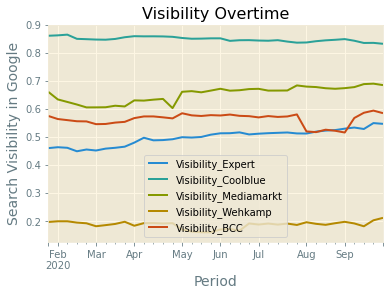

In [54]:
#plot is like it's hot
pivot = dataset.groupby(['Datum']).mean()
pivot.plot(kind='line',title='Visibility Overtime')
plt.xlabel('Period', fontsize=14)
plt.ylabel('Search Visibility in Google', fontsize=14)
plt.style.use('Solarize_Light2')
plt.show()

# NOW EVEN MORE FUN! INTERACTIVE PLOTTING ^_^

In [56]:
#create a widget
tags = widgets.Dropdown(
    options=['All'] + list(dataset['Categorie'].unique()),
    value='All',
    description='Category:',
        
)

def plotit(tags):
    if 0 > 1:
        print('Nothing to show')  
    else: 
        dataset2 = dataset.copy()
        if tags != 'All':
            dataset2 = dataset2[dataset2.Categorie == tags]
            plt.style.use('Solarize_Light2')
            plt.show()
        
        if len(dataset2) > 0:
            dataset2.groupby(['Datum']).mean().plot(kind='line',figsize=(14,4))
            plt.xlabel('Period', fontsize=14)
            plt.ylabel('Search Visibility', fontsize=14)
            plt.title('Search Visibility in Google for {}'.format(tags), fontsize=20)
            plt.style.use('Solarize_Light2')
            plt.show()
        else: 
            print('Nothing to show')
            
#get a 100% width view for the full experience on this one (optional)
display(HTML("<style>.container { width:100% !important; }</style>"))

interactive(plotit, tags=tags)

interactive(children=(Dropdown(description='Category:', options=('All', 'Koelkast', 'Speaker', 'Merken', 'Comp…

# CREATE RANKING REPORT

In [57]:
#get the data in place
rnk = pd.read_csv('./workfile/ranking.csv') # <<-- remember we created this file earlier? ^_^
rnk.fillna(0, inplace=True)
rnk['Datum'] =  pd.to_datetime(rnk['Datum'], format='%Y%m%d', infer_datetime_format=True)
rnk[rnk.eq(0)] = np.nan
rnk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20556 entries, 0 to 20555
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Datum                20556 non-null  datetime64[ns]
 1   Keyword              20556 non-null  object        
 2   Search_Volume        20556 non-null  float64       
 3   Tags                 20556 non-null  object        
 4   Categorie            20556 non-null  object        
 5   Rankings_Expert      17279 non-null  float64       
 6   Rankings_Coolblue    20307 non-null  float64       
 7   Rankings_Mediamarkt  19307 non-null  float64       
 8   Rankings_Wehkamp     15492 non-null  float64       
 9   Rankings_BCC         19553 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(3)
memory usage: 1.6+ MB


In [58]:
#create a widget
tags = widgets.Dropdown(
    options=['All'] + list(rnk['Categorie'].unique()),
    value='All',
    description='Category:',        
)

def plotit(tags):
    if 0 > 1:
        print('Nothing to show')  
    else: 
        dataset2 = rnk.copy()
        if tags != 'All':
            dataset2 = dataset2[dataset2.Categorie == tags]
            plt.style.use('Solarize_Light2')
            plt.show()
        
        if len(dataset2) > 0:
            dataset2.drop('Search_Volume', axis=1, inplace=True)
            dataset2.groupby(['Datum']).mean().plot(kind='line',figsize=(14,4))
            plt.xlabel('Period', fontsize=14)
            plt.ylabel('Rankings in Google', fontsize=14)
            plt.gca().invert_yaxis()
            plt.title('Rankings in Google for category {}'.format(tags), fontsize=20)
            plt.style.use('Solarize_Light2')
            plt.show()
        else: 
            print('Nothing to show')

#get a 100% width view for the full experience on this one (optional)
display(HTML("<style>.container { width:100% !important; }</style>"))

interactive(plotit, tags=tags)

interactive(children=(Dropdown(description='Category:', options=('All', 'Koelkast', 'Speaker', 'Merken', 'Comp…

In [59]:
## WE CAN DO THE SAME FOR ALL EACH KEYWORD ##
kws = widgets.Dropdown(
    options=['All'] + list(rnk['Keyword'].unique()),
    value='All',
    description='Keyword:',        
)

def plotit2(kws):
    if 0 > 1:
        print('Nothing to show')  
    else: 
        dataset2 = rnk.copy()
        if kws != 'All':
            dataset2 = dataset2[dataset2.Keyword == kws]
            plt.style.use('Solarize_Light2')
            plt.show()
        
        if len(dataset2) > 0:
            dataset2.drop('Search_Volume', axis=1, inplace=True)
            dataset2.groupby(['Datum']).mean().plot(kind='line',figsize=(14,4))
            plt.xlabel('Period', fontsize=14)
            plt.ylabel('Rankings in Google', fontsize=14)
            plt.gca().invert_yaxis()
            plt.title('Rankings in Google for keyword [{}]'.format(kws), fontsize=20)
            plt.style.use('Solarize_Light2')
            plt.show()
        else: 
            print('Nothing to show') 
            
#get a 100% width view for the full experience on this one (optiional)
display(HTML("<style>.container { width:100% !important; }</style>"))

interactive(plotit, tags=tags)

interactive(children=(Dropdown(description='Category:', options=('All', 'Koelkast', 'Speaker', 'Merken', 'Comp…

# PIVOT INTO ACTIONABLE AND INTERACTIVE TABLE

In [60]:
#do some data tweaks
pivot_df = pd.read_csv('./workfile/ranking.csv')
pivot_df[pivot_df.eq(0)] = np.nan
pivot_df["Search_Volume"] = pivot_df["Search_Volume"].astype(int)
pivot_df['Datum'] =  pd.to_datetime(pivot_df['Datum'], format='%Y%m%d', infer_datetime_format=True)
pivot_df.info()

In [64]:
rankings = pivot_df[['Datum', 'Keyword', 'Categorie', 'Search_Volume', 'Tags', 'Rankings_BCC']]
rankings.sort_values(by='Datum')

,Datum,Keyword,Categorie,Search_Volume,Tags,Rankings_BCC
0,2020-01-29,beko koelkast,Koelkast,2400,keuken|koelkast,7.0
1479,2020-01-29,soundbar,Soundbar,27100,beeld en geluid|soundbar,12.0
14197,2020-01-29,sony koptelefoon,Koptelefoon,2400,beeld en geluid|koptelefoon,6.0
14191,2020-01-29,elektrisch kookplaatje,Fornuis en kookplaat,9900,keuken|kookplaat,12.0
14173,2020-01-29,sony bravia tv,Televisie,2400,beeld en geluid|televisie,11.0
...,...,...,...,...,...,...
17904,2020-09-30,mini laptop,Laptop,3600,computer|laptop,19.0
10561,2020-09-30,karcher stofzuiger,Stofzuiger,2900,huishouden|stofzuiger,7.0
13520,2020-09-30,samsung oortjes,Koptelefoon,6600,beeld en geluid|oortjes,10.0
8613,2020-09-30,heos soundbar,Soundbar,3600,beeld en geluid|soundbar,30.0


In [65]:
#create interactive pivot (to see in new tab: go to http://localhost:{PORT}/files/{YOUR_PROJECT_LOCATION}/pivottablejs.html)
pivot_ui(rankings,      
    cols= ["Datum"],
    rows= ["Search_Volume"],
    rowOrder= "value_a_to_z",
    rendererOptions= {
        "c3": { "data": {"colors": {
            "Liberal": '#dc3912', "Conservative": '#3366cc', "NDP": '#ff9900',
            "Green":'#109618', 'Bloc Quebecois': '#990099'
        }}}
    }
)